# Setting Up and Examining the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
star_wars = pd.read_csv('star_wars.csv')
import seaborn as sns
import re

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Data Cleaning

In [4]:
#removes all rows without a Respondent ID
star_wars = star_wars[star_wars['RespondentID'].notnull() == True]

In [5]:
#converts the values in the 'Have you seen any...?' column to booleans
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes': True, 'No': False})

In [6]:
#converts the values in the 'Do you consider yourself [a fan]?' column to booleans
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes': True, 'No': False})

In [7]:
film_names = [
    'Star Wars: Episode I The Phantom Menace',
    'Star Wars: Episode II Attack of the Clones', 
    'Star Wars: Episode III Revenge of the Sith', 
    'Star Wars: Episode IV A New Hope', 
    'Star Wars: Episode V The Empire Strikes Back',
    'Star Wars: Episode VI Return of the Jedi'
]
column_names = [col for col in star_wars.columns[3:9]]
#converts the values in columns 3 through 8 to boolean values
for name in column_names:
    star_wars[name] = star_wars[name].apply(lambda x: False if pd.isnull(x) else True)

In [8]:
#renames the columns 3 through 8 to seen_x, with x being the film number in the franchise
for i in range (0,6):
    star_wars = star_wars.rename(columns={column_names[i]: "seen_" + str(i+1)})

In [9]:
#converts columns 9 through 14 to floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
#renames columns 9 through 14 to ranking_x, with x being the film number in the francise
for i in range (0,6):
    star_wars = star_wars.rename(columns={star_wars.columns[i+9]:"ranking_" + str(i+1)})

# Plotting Findings

In [11]:
ranking_means = star_wars[star_wars.columns[9:15]].mean()

In [12]:
%matplotlib inline

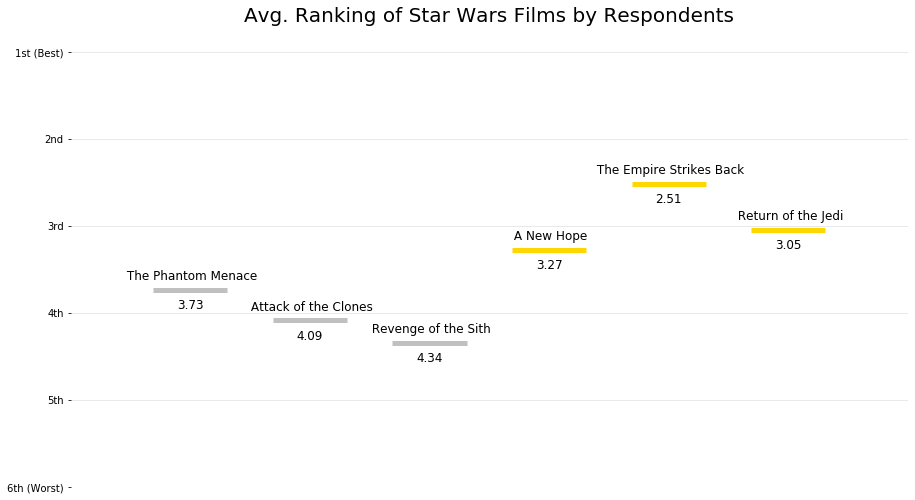

In [73]:
#makes a figure plotting avg. ranking of each film
plt.figure(figsize=(15,8))
ax = plt.gca()
plt.scatter(x=film_names, y=ranking_means, marker='_', s=5500, linewidth=5, color=["silver","silver",'silver','gold','gold','gold'])
ax.set_ylim((6,1))
ax.set_xlim((-1,6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(
    axis='x',          
    which='both',   
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.grid(axis='y',alpha=.35)
plt.yticks(ticks=[1,2,3,4,5,6], labels=['1st (Best)','2nd','3rd','4th','5th','6th (Worst)'])
plt.title('Avg. Ranking of Star Wars Films by Respondents', pad=30, size=20)
for x,y in zip(film_names, ranking_means):
    label = re.split(r': Episode [IV]+', x)[1]
    plt.annotate(label, (x,y),textcoords="offset points", xytext=(0,10), ha='center', size=12)
    plt.annotate(np.round(y,2), (x,y),textcoords="offset points", xytext=(0,-19), ha='center', size=12)

Clearly, the original trilogy are preferred to the prequels. Even the lowest ranked of the three originals (A New Hope) has a higher average ranking than the highest ranked of the prequels (Phantom Menace).

In [25]:
num_seen = star_wars[star_wars.columns[3:9]].sum()

(0, 800)

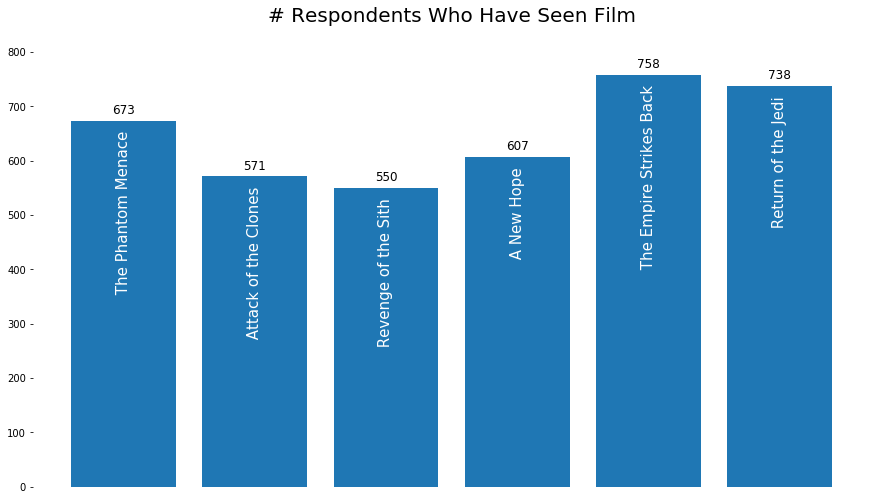

In [77]:
plt.figure(figsize=(15,8))
ax = plt.gca()
plt.bar(x=film_names, height=num_seen)
plt.title('# Respondents Who Have Seen Film', pad=30, size=20)
for x,y in zip(film_names, num_seen):
    label = re.split(r': Episode [IV]+', x)[1]
    plt.annotate(label, (x,y), ha='center', va='top', size=15, rotation=90, c='white',textcoords="offset points", xytext=(0,-10))
    plt.annotate(np.round(y,2), (x,y),textcoords="offset points", xytext=(0,7), ha='center', size=12, c='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(
    axis='x',          
    which='both',   
    bottom=False,      
    top=False,         
    labelbottom=False)
ax.set_ylim((0,800))